# Research Scraping and Visulization

Importing matplotlib for creating graphs

In [1]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64

Importing libraries for image displaying

In [2]:
from IPython import display
from base64 import b64decode

Functions for scraping Research papers and creating graphs

In [3]:
def myscholar(q):
    from bs4 import BeautifulSoup
    import requests, lxml, os, json

    headers = {
        'User-agent':
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
    }

    proxies = {
        'http': os.getenv('HTTP_PROXY')  # or just type proxy here without os.getenv()
    }
    html = requests.get('https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q='+q+'&oq=', headers=headers,
                        proxies=proxies).text

    soup = BeautifulSoup(html, "html.parser")

    data = dict()
    numbers = []
    titles = []
    counter = 0

    # Container where all needed data is located
    for result in soup.select('.gs_ri'):
        title = result.select_one('.gs_rt').text
        title_link = result.select_one('.gs_rt a')['href']
        publication_info = result.select_one('.gs_a').text
        temp = []
        for word in publication_info.split():
            if word.isdigit():
                temp.append(int(word))
                numbers.append(temp)

        titles.append(title)

        snippet = result.select_one('.gs_rs').text
        cited_by = result.select_one('#gs_res_ccl_mid .gs_nph+ a')['href']
        related_articles = result.select_one('a:nth-child(4)')['href']

        try:
            all_article_versions = result.select_one('a~ a+ .gs_nph')['href']
        except:
            all_article_versions = None


        temp = dict()
        temp['title']=title
        temp['title_link']=title_link
        temp['publication_info']=publication_info
        temp['snippet']=snippet
        temp['cited_by']=f'https://scholar.google.com{cited_by}'
        temp['related_articles']=f'https://scholar.google.com{related_articles}'
        temp['all_article_versions']=f'https://scholar.google.com{all_article_versions}'
        data[counter] = temp
        counter = counter +1


    #print(json.dumps(data, indent=2, ensure_ascii=False))
    extra_data = dict()
    extra_data[0]=data
    extra_data[1]=numbers
    extra_data[2]=titles

    return extra_data

#graphssssssss

def get_graph():
    # creates memory buffer
    buffer = BytesIO()
    # save image in buffer in png format
    plt.savefig(buffer, bbox_inches='tight', format='png')
    buffer.seek(0)
    # get buffer value in string form
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png)
    graph = graph.decode('utf-8')
    buffer.close()
    return graph

def get_plot(x, y):
    plt.switch_backend('AGG')
    plt.figure(figsize=(15, 10))
    plt.title("Growth Over Time")
    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel('Researhes')
    plt.tight_layout()
    graph = get_graph()
    return graph

def myplot(title,dates):
    num = []
    for i in dates:
        for j in i:
            if j not in num:
                num.append(j)

    return get_plot(sorted(dates),title)


calling scraper and visualization

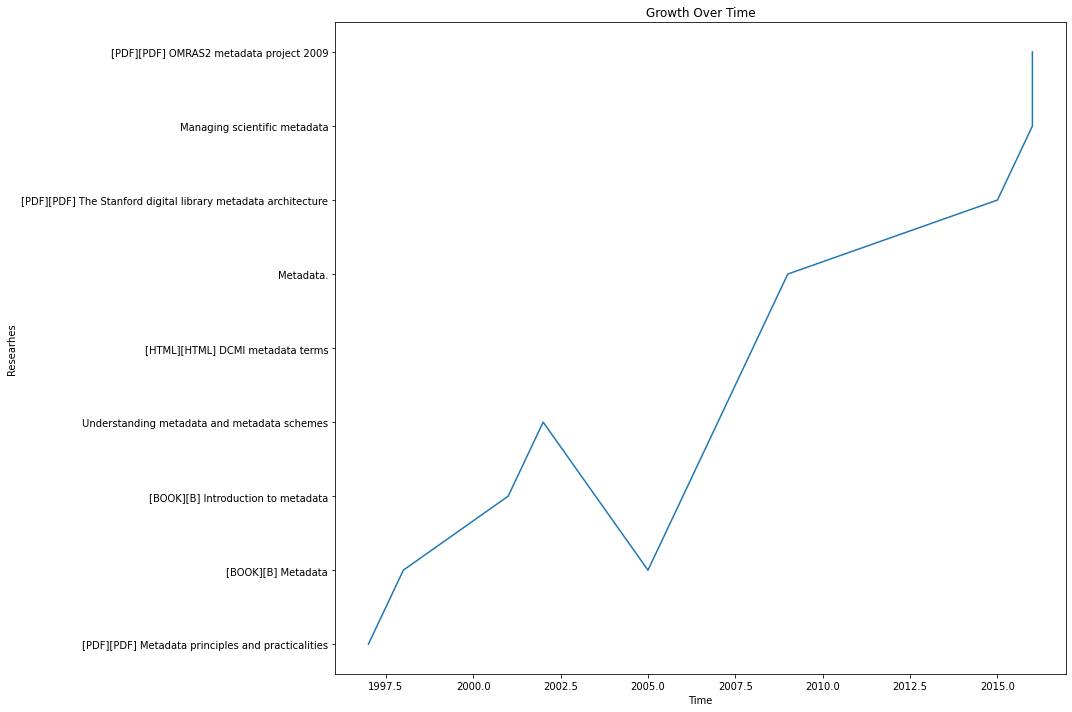

In [4]:
query = "meta data"
data = myscholar(query)
dates = data[1]
titles = data[2]
data = data[0]
graph = myplot(titles,dates)
display.Image(b64decode(graph))


Printing the scraped research papers

In [6]:
print(data)

{0: {'title': '[PDF][PDF] Metadata principles and practicalities', 'title_link': 'http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.88.5042&rep=rep1&type=pdf', 'publication_info': 'E Duval, W Hodgins, S Sutton, SL Weibel\xa0- D-lib Magazine, 2002 - Citeseer', 'snippet': 'The rapid changes in the means of information access occasioned by the emergence of the World Wide Web have spawned an upheaval in the means of describing and managing information resources. Metadata is a primary tool in this work, and an important link in the\xa0…', 'cited_by': 'https://scholar.google.com/scholar?cites=14134035200873738762&as_sdt=2005&sciodt=0,5&hl=en', 'related_articles': 'https://scholar.google.com/scholar?q=related:CjLyPiEuJsQJ:scholar.google.com/&scioq=metadata&hl=en&as_sdt=0,5', 'all_article_versions': 'https://scholar.google.com/scholar?cluster=14134035200873738762&hl=en&as_sdt=0,5'}, 1: {'title': '[BOOK][B] Metadata', 'title_link': 'https://books.google.com/books?hl=en&lr=&id=j0X7CgAAQBA